In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pylab as plt
from tqdm import tqdm
from sklearn.cluster import KMeans

In [17]:
path = '/media/yongkp/CMAPSSData'

train_path_list = sorted(glob(path + '/train*'))
test_path_list = sorted(glob(path + '/test*'))
rul_path_list = sorted(glob(path + '/RUL*'))

In [18]:
col_name = ['unit number', 'time', 'op1', 'op2', 'op3']
temp = ['sensor %d'%(i+1) for i in range(23)]

load_col_name = col_name + temp
col_name = load_col_name[:-2]

In [19]:
train = []
for t_path in train_path_list:
    temp = pd.read_table(t_path, sep = ' ', header = None, names=load_col_name)
    train.append(temp[col_name])

test = []
for t_path in test_path_list:
    temp = pd.read_table(t_path, sep = ' ', header = None, names=load_col_name)
    test.append(temp[col_name])
    
RUL = []
for r_path in rul_path_list:
    temp = pd.read_table(r_path, header = None, names = ['RUL'])
    RUL.append(temp)

In [20]:
trains = pd.concat(train, axis = 0)
trains = trains.iloc[:,[2,3]]

tests = pd.concat(test, axis = 0)
tests = tests.iloc[:,[2,3]]

kmeans = KMeans(n_clusters=6, random_state=0).fit(trains)

In [21]:
train0 = kmeans.predict(train[0].iloc[:,[2,3]])
train1 = kmeans.predict(train[1].iloc[:,[2,3]])
train2 = kmeans.predict(train[2].iloc[:,[2,3]])
train3 = kmeans.predict(train[3].iloc[:,[2,3]])

In [8]:
bool_mask1 = (train1 == 2)
bool_mask3 = (train3 == 2)

new_train1 = train[1][bool_mask1]
new_train3 = train[3][bool_mask3]

In [22]:
train_cluster2 = [train[0], new_train1, train[1], new_train3]

In [28]:
unit_number1_bool = train_cluster2[0]['unit number'] == 1
x = train_cluster2[0][unit_number1_bool]
x

,unit number,time,op1,op2,op3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [30]:
#selected = [2, 3, 4, 7, 8, 11, 12, 13, 15, 17, 20, 21]
selected = [2, 3, 4, 8, 11, 13, 15, 17]
selected_sensor = ['sensor %d'%i for i in selected]
x[selected_sensor]

,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 11,sensor 12,sensor 13,sensor 15,sensor 17,sensor 20,sensor 21
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...
187,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396,38.51,22.9588
188,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395,38.48,23.1127
189,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398,38.49,23.0675
190,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394,38.45,23.1295


In [31]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [37]:
temp = 0
for sensor in selected_sensor:
    temp += x[sensor]/len(selected_sensor)

In [44]:
import statsmodels.api as sm
from sklearn import linear_model

In [46]:
t = np.arange(192)
popt, pcov = curve_fit(func, t, temp)

<ipython-input-31-c9ab7384557e>:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


In [66]:
popt

array([ 7.42704771e-02, -2.06461185e-02,  8.32495178e+02])

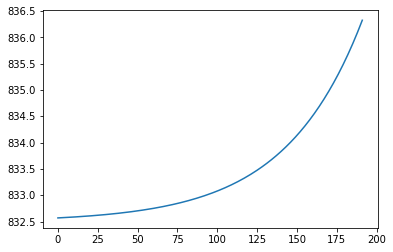

In [65]:
plt.plot(t, func(t,*popt))